In [18]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df = pd.read_csv('twitchdata-update.csv')
print("First 5 records:")
print(df.head())



First 5 records:
    Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese

In [19]:
# Identify columns by dtype
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist() + bool_cols
numeric_cols, bool_cols, cat_cols

(['Watch time(Minutes)',
  'Stream time(minutes)',
  'Peak viewers',
  'Average viewers',
  'Followers',
  'Followers gained',
  'Views gained'],
 ['Partnered', 'Mature'],
 ['Channel', 'Language', 'Partnered', 'Mature'])

In [20]:
# Numeric summary with IQR-based outlier counts
def numeric_summary(frame: pd.DataFrame, columns):
    q1 = frame[columns].quantile(0.25)
    q3 = frame[columns].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_counts = ((frame[columns].lt(lower)) | (frame[columns].gt(upper))).sum()
    return pd.DataFrame({
        'min': frame[columns].min(),
        'max': frame[columns].max(),
        'mean': frame[columns].mean(),
        'median': frame[columns].median(),
        'std': frame[columns].std(ddof=1),
        'q1': q1, 'q3': q3, 'iqr': iqr,
        'outliers(1.5*IQR)': outlier_counts
    })

numeric_summary(df, numeric_cols)

,min,max,mean,median,std,q1,q3,iqr,outliers(1.5*IQR)
Watch time(Minutes),122192850,6196161750,4.184279e+08,234990787.5,5.496355e+08,1.631899e+08,4.337399e+08,2.705500e+08,107
Stream time(minutes),3465,521445,1.205152e+05,108240.0,8.537620e+04,7.375875e+04,1.418438e+05,6.808500e+04,48
Peak viewers,496,639375,3.706505e+04,16676.0,6.031431e+04,9.113750e+03,3.756975e+04,2.845600e+04,113
Average viewers,235,147643,4.781040e+03,2425.0,8.453685e+03,1.457750e+03,4.786250e+03,3.328500e+03,100
Followers,3660,8938903,5.700541e+05,318063.0,8.044134e+05,1.705462e+05,6.243322e+05,4.537860e+05,89
Followers gained,-15772,3966525,2.055185e+05,98352.0,3.399137e+05,4.375825e+04,2.361308e+05,1.923725e+05,90
Views gained,175788,670137548,1.166817e+07,6456323.5,2.490572e+07,3.880602e+06,1.219676e+07,8.316160e+06,91


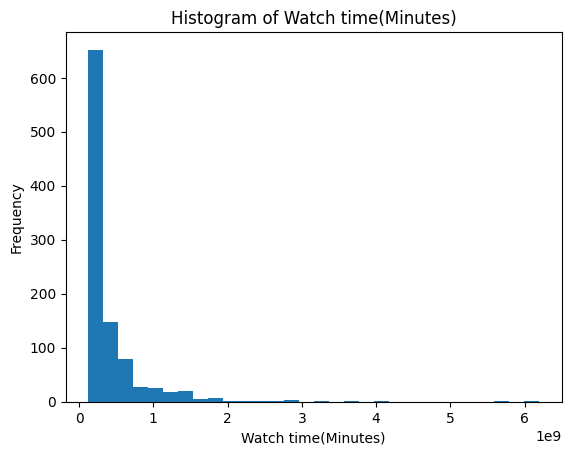

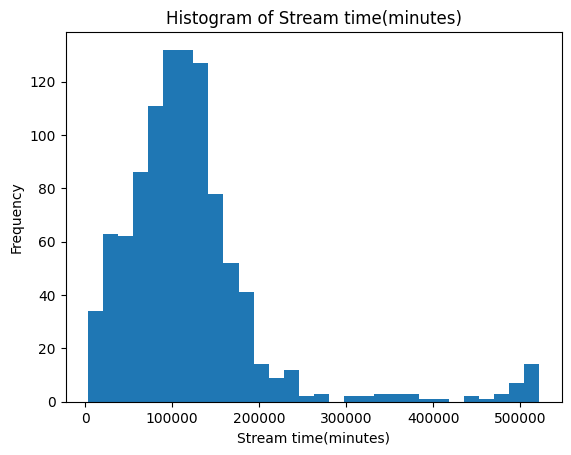

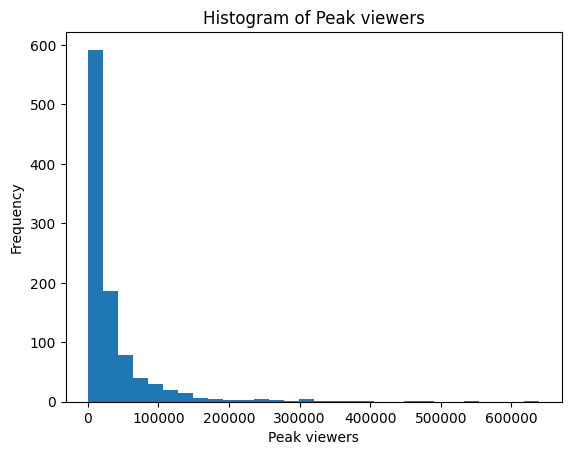

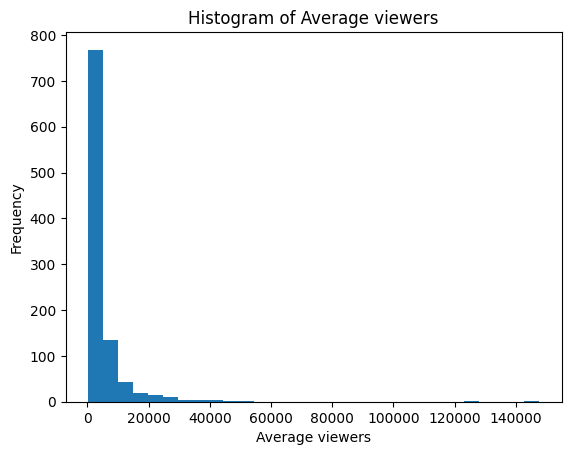

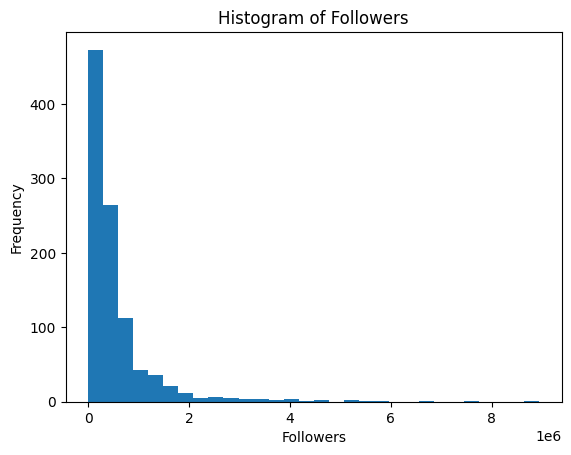

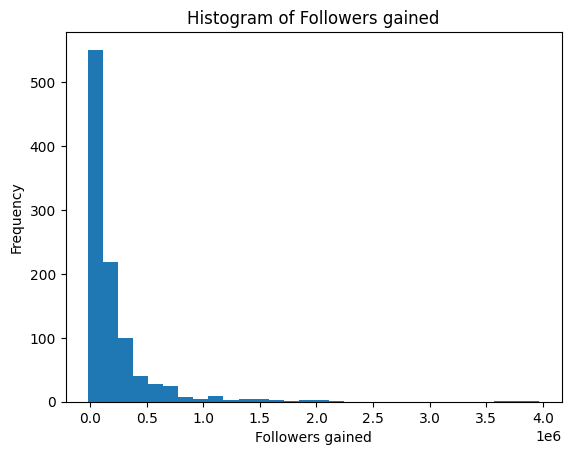

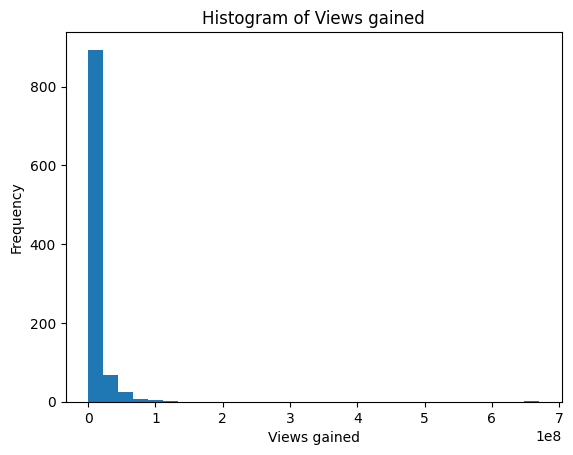

C:\Users\tyler\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tyler\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tyler\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


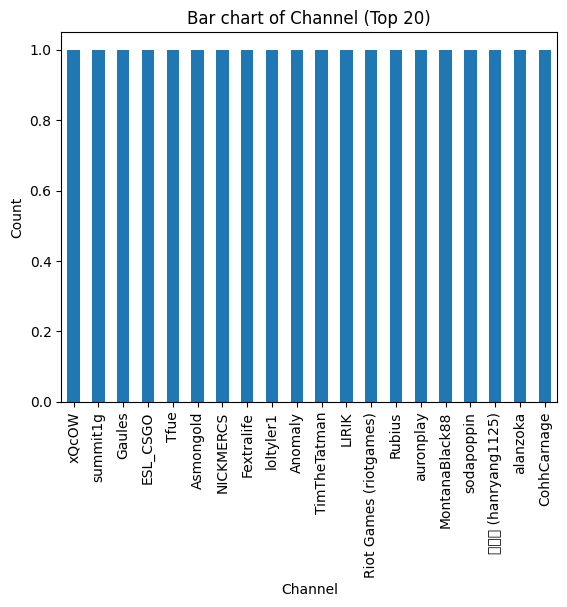

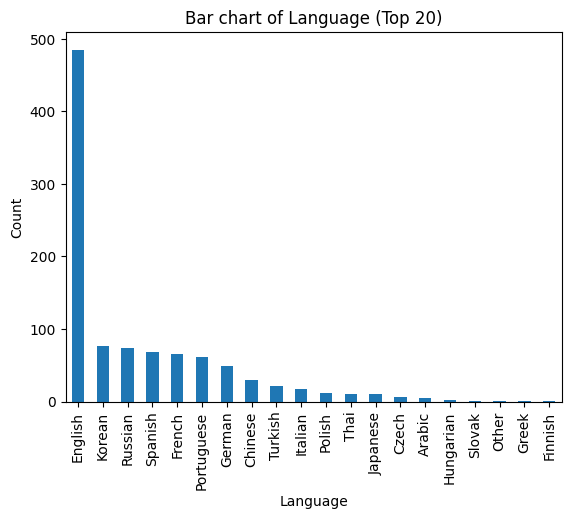

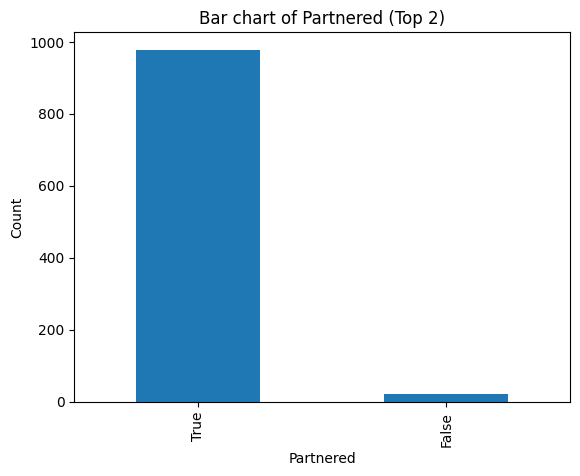

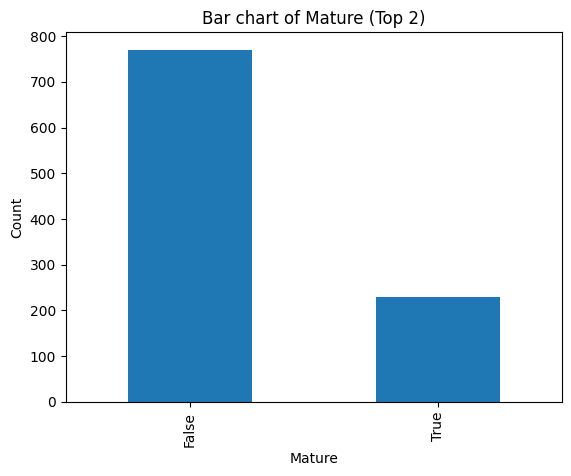

In [21]:
# Histograms for numeric; bar charts for categorical
for col in numeric_cols:
    df[col].plot(kind='hist', bins=30, title=f'Histogram of {col}')
    plt.xlabel(col); plt.ylabel('Frequency'); plt.show()

for col in cat_cols:
    counts = df[col].value_counts().sort_values(ascending=False).head(20)
    counts.plot(kind='bar', title=f'Bar chart of {col} (Top {len(counts)})')
    plt.xlabel(col); plt.ylabel('Count'); plt.show()

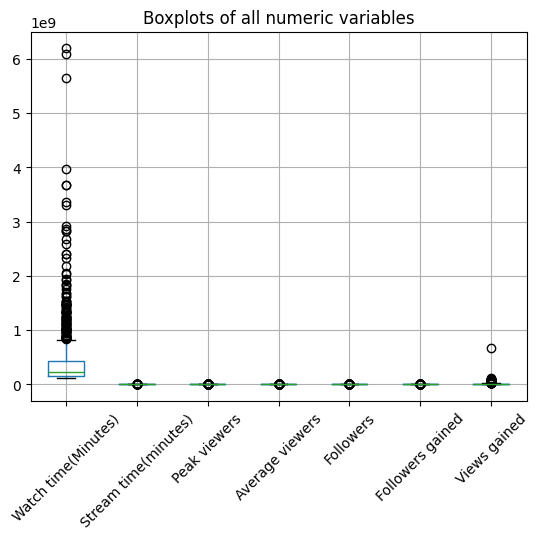

In [22]:
# Combined box plot of all numeric columns
df[numeric_cols].boxplot(rot=45)
plt.title('Boxplots of all numeric variables')
plt.show()

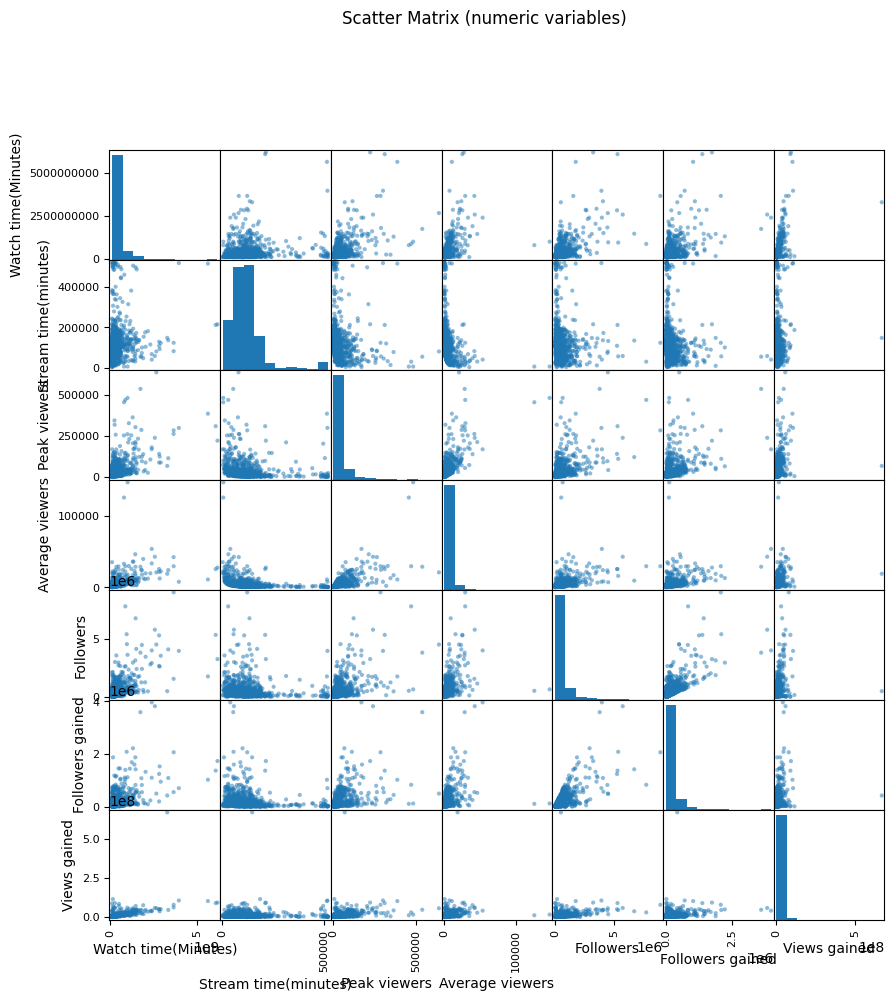

In [23]:
# Scatter matrix for numeric columns
axes = scatter_matrix(df[numeric_cols], alpha=0.5, figsize=(10,10), diagonal='hist')
plt.suptitle('Scatter Matrix (numeric variables)', y=1.02)
plt.show()

In [24]:
# Categorical vs categorical: Language (Top 8) x Partnered
top_langs = df['Language'].value_counts().head(8).index.tolist()
ct = pd.crosstab(df['Language'].where(df['Language'].isin(top_langs), other='Other'), df['Partnered']).sort_values(by=[False, True], ascending=False)
ct

Partnered,False,True
Language,,
English,9,476
Russian,7,67
Other,1,89
Korean,1,76
Spanish,1,67
French,1,65
Portuguese,1,60
German,1,48
Chinese,0,30


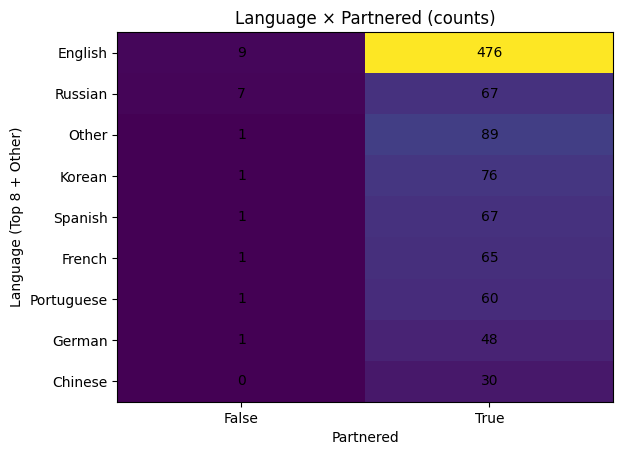

In [25]:
# Heatmap for the crosstab (matplotlib only)
plt.imshow(ct.values, aspect='auto')
plt.xticks(range(ct.columns.size), ct.columns.astype(str).tolist())
plt.yticks(range(ct.index.size), ct.index.tolist())
plt.xlabel('Partnered'); plt.ylabel('Language (Top 8 + Other)')
plt.title('Language × Partnered (counts)'); 
for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        plt.text(j, i, int(ct.values[i, j]), ha='center', va='center')
plt.show()

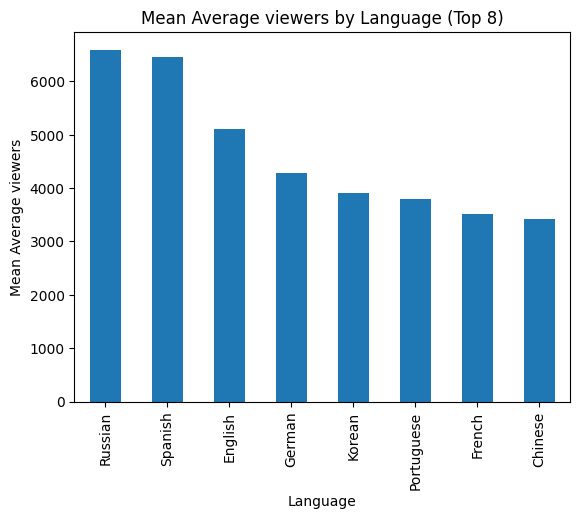

In [26]:
# Aggregate one variable vs another: mean Average viewers by Language (Top 8)
avg_by_lang = df[df['Language'].isin(top_langs)].groupby('Language')['Average viewers'].mean().sort_values(ascending=False)
avg_by_lang.plot(kind='bar', title='Mean Average viewers by Language (Top 8)')
plt.xlabel('Language'); plt.ylabel('Mean Average viewers'); plt.show()

C:\Users\tyler\AppData\Local\Temp\ipykernel_29196\1361916845.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(groups, labels=[str(v) for v in sorted(df['Partnered'].unique())])


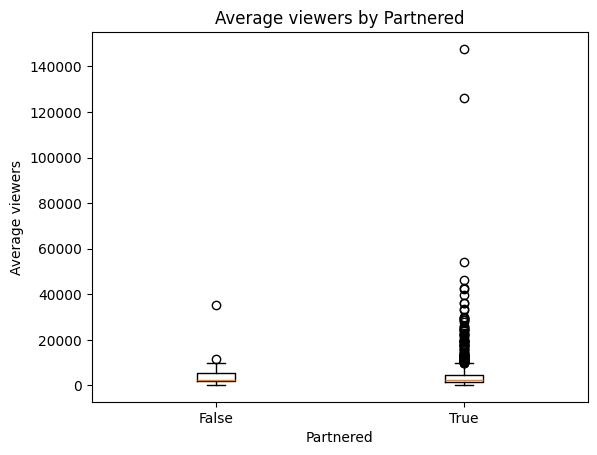

C:\Users\tyler\AppData\Local\Temp\ipykernel_29196\1361916845.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(groups, labels=[str(v) for v in sorted(df['Mature'].unique())])


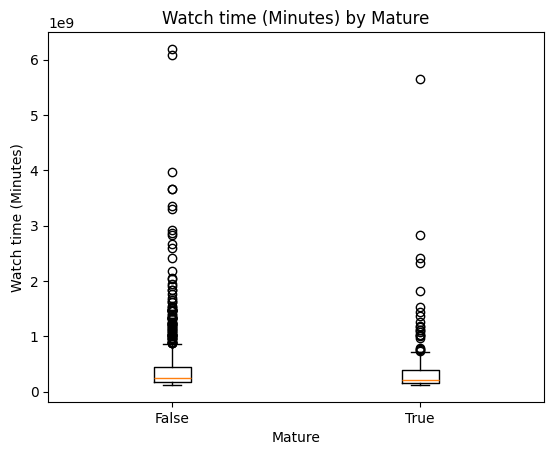

In [27]:
# Categorical vs numeric: boxplots
fig, ax = plt.subplots()
groups = [df.loc[df['Partnered']==val, 'Average viewers'].dropna() for val in sorted(df['Partnered'].unique())]
ax.boxplot(groups, labels=[str(v) for v in sorted(df['Partnered'].unique())])
ax.set_title('Average viewers by Partnered'); ax.set_xlabel('Partnered'); ax.set_ylabel('Average viewers'); plt.show()

fig, ax = plt.subplots()
groups = [df.loc[df['Mature']==val, 'Watch time(Minutes)'].dropna() for val in sorted(df['Mature'].unique())]
ax.boxplot(groups, labels=[str(v) for v in sorted(df['Mature'].unique())])
ax.set_title('Watch time (Minutes) by Mature'); ax.set_xlabel('Mature'); ax.set_ylabel('Watch time (Minutes)'); plt.show()